In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.manifold import trustworthiness
from sklearn.decomposition import PCA
import tensorflow as tf

***Read image data and its label***

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

0 255
0 255


In [4]:
from collections import Counter
# Fashion MNIST class names
fashion_mnist_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

train_labels = np.array([fashion_mnist_labels[p] for p in y_train])

def get_label_count(y_data):
    # Count the occurrences of each label in y_train
    label_counts = Counter(y_data)

    # Map the label numbers to their names
    label_name_counts = {fashion_mnist_labels[label]: count for label, count in label_counts.items()}

    # Display the label counts
    for label, count in label_name_counts.items():
        print(f"{label}: {count}")
print("-----Training label count-----")
get_label_count(y_train)
print("-----Valid label count-----")
get_label_count(y_valid)
print("-----Test label count-----")
get_label_count(y_test)

-----Training label count-----
Shirt: 4800
Dress: 4800
T-shirt/top: 4800
Sandal: 4800
Ankle boot: 4800
Trouser: 4800
Sneaker: 4800
Bag: 4800
Coat: 4800
Pullover: 4800
-----Valid label count-----
Sandal: 1200
Coat: 1200
Pullover: 1200
Trouser: 1200
T-shirt/top: 1200
Dress: 1200
Shirt: 1200
Bag: 1200
Ankle boot: 1200
Sneaker: 1200
-----Test label count-----
Ankle boot: 1000
Pullover: 1000
Trouser: 1000
Shirt: 1000
Coat: 1000
Sandal: 1000
Sneaker: 1000
Dress: 1000
Bag: 1000
T-shirt/top: 1000


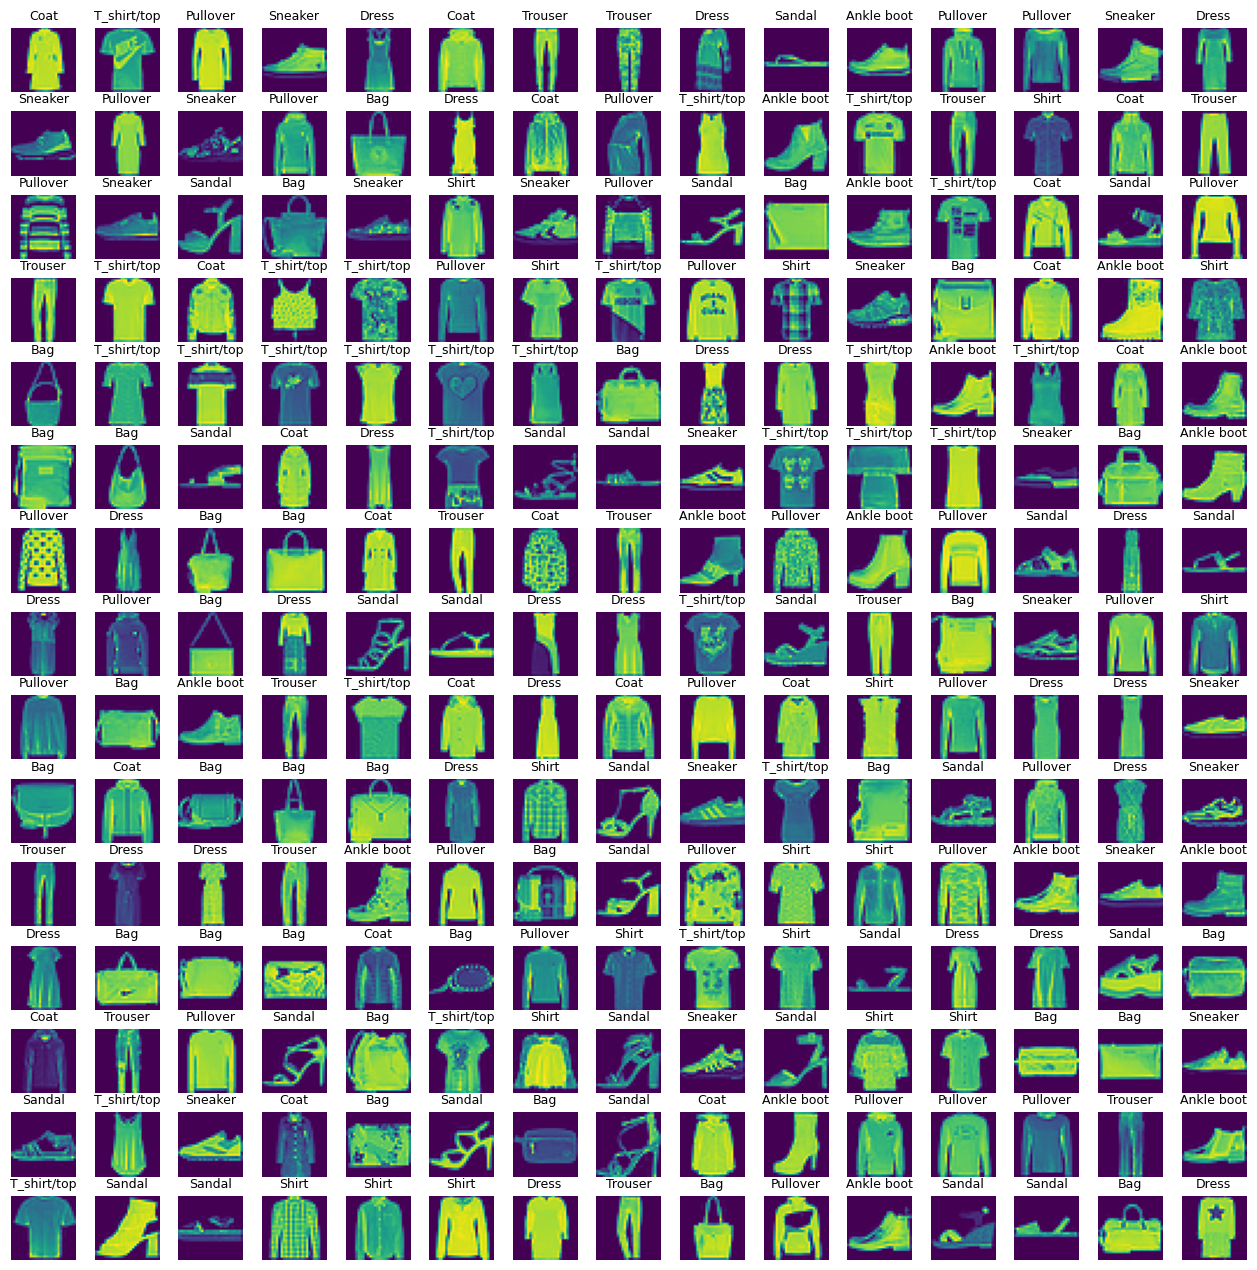

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index].reshape((28,28)) )
    labelindex = int(y_train[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [5]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

'Dress'

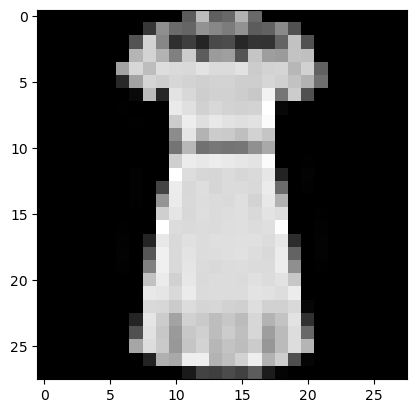

In [6]:
img = X_train[2]
plt.imshow(img, cmap='gray')
fashion_mnist_labels[y_train[2]]